##### DateSet :  https://www.kaggle.com/amitabhajoy/bengaluru-house-price-data

In [1]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt 
%matplotlib inline
import matplotlib
matplotlib.rcParams["figure.figsize"] = (20,15)
import re
import warnings;
warnings.filterwarnings('ignore');

In [2]:
df1 = pd.read_csv("Bengaluru_House_Data.csv")
df1.shape

(13320, 9)

In [3]:
df1.head(5)

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


In [4]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13320 entries, 0 to 13319
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   area_type     13320 non-null  object 
 1   availability  13320 non-null  object 
 2   location      13319 non-null  object 
 3   size          13304 non-null  object 
 4   society       7818 non-null   object 
 5   total_sqft    13320 non-null  object 
 6   bath          13247 non-null  float64
 7   balcony       12711 non-null  float64
 8   price         13320 non-null  float64
dtypes: float64(3), object(6)
memory usage: 624.4+ KB


In [5]:
df1.groupby('availability')['availability'].agg('count')

availability
14-Jul                      1
14-Nov                      1
15-Aug                      1
15-Dec                      1
15-Jun                      1
                        ...  
22-Mar                      3
22-May                     10
22-Nov                      2
Immediate Possession       16
Ready To Move           10581
Name: availability, Length: 81, dtype: int64

In [6]:
len(df1.society.unique())

2689

###### Droping features not require for model.

In [7]:
df2 = df1.drop(['society', 'availability','area_type'], axis  = 1)
df2.head(3)

,location,size,total_sqft,bath,balcony,price
0,Electronic City Phase II,2 BHK,1056,2.0,1.0,39.07
1,Chikka Tirupathi,4 Bedroom,2600,5.0,3.0,120.00
2,Uttarahalli,3 BHK,1440,2.0,3.0,62.00


In [8]:
df2.isnull().sum()

location        1
size           16
total_sqft      0
bath           73
balcony       609
price           0
dtype: int64

<AxesSubplot:>

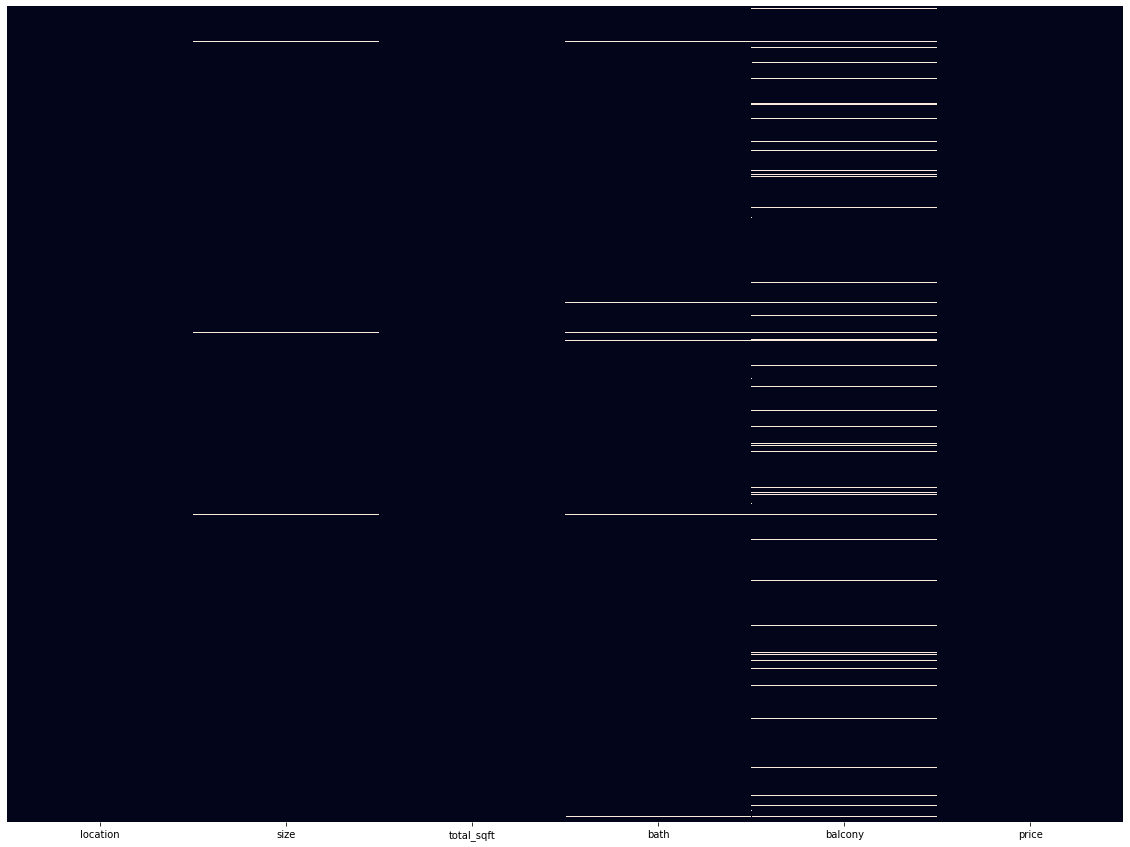

In [9]:
sns.heatmap(df2.isnull(), yticklabels = False, cbar = False)

In [10]:
# we wiil drop bath(73) null values from every features
df2 = df2.dropna(subset=['location', 'bath'])    
df2.isnull().sum()

location        0
size            0
total_sqft      0
bath            0
balcony       536
price           0
dtype: int64

In [11]:
# we assuming here that every house have at least 1 balcony.
df2['balcony']=df2['balcony'].fillna(1)
df3 = df2.copy()
df3.isnull().sum()

location      0
size          0
total_sqft    0
bath          0
balcony       0
price         0
dtype: int64

In [12]:
df3.shape

(13246, 6)

### Feature Engineering

#### Analyze 'Size' feature

In [13]:
df3['size'].unique()

array(['2 BHK', '4 Bedroom', '3 BHK', '4 BHK', '6 Bedroom', '3 Bedroom',
       '1 BHK', '1 RK', '1 Bedroom', '8 Bedroom', '2 Bedroom',
       '7 Bedroom', '5 BHK', '7 BHK', '6 BHK', '5 Bedroom', '11 BHK',
       '9 BHK', '9 Bedroom', '27 BHK', '10 Bedroom', '11 Bedroom',
       '10 BHK', '19 BHK', '16 BHK', '43 Bedroom', '14 BHK', '8 BHK',
       '12 Bedroom', '13 BHK', '18 Bedroom'], dtype=object)

In [14]:
df3['bhk'] = df3['size'].apply(lambda x: int(x.split(' ')[0]))
df3.head()

,location,size,total_sqft,bath,balcony,price,bhk
0,Electronic City Phase II,2 BHK,1056,2.0,1.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600,5.0,3.0,120.00,4
2,Uttarahalli,3 BHK,1440,2.0,3.0,62.00,3
3,Lingadheeranahalli,3 BHK,1521,3.0,1.0,95.00,3
4,Kothanur,2 BHK,1200,2.0,1.0,51.00,2


In [15]:
df3.bhk.unique()       #there is homes with 43 bhk, so it is outlier first we will check sqft

array([ 2,  4,  3,  6,  1,  8,  7,  5, 11,  9, 27, 10, 19, 16, 43, 14, 12,
       13, 18], dtype=int64)

In [16]:
df3[df3.bhk > 20]  #checking bhk with sqfit. outlier is present

,location,size,total_sqft,bath,balcony,price,bhk
1718,2Electronic City Phase II,27 BHK,8000,27.0,0.0,230.0,27
4684,Munnekollal,43 Bedroom,2400,40.0,0.0,660.0,43


#### total_sqft

In [17]:
def is_float(x):
    try:
        float(x)
    except:
        return False
    return True

In [18]:
df3[~df3['total_sqft'].apply(is_float)].head(10)

,location,size,total_sqft,bath,balcony,price,bhk
30,Yelahanka,4 BHK,2100 - 2850,4.0,0.0,186.000,4
122,Hebbal,4 BHK,3067 - 8156,4.0,0.0,477.000,4
137,8th Phase JP Nagar,2 BHK,1042 - 1105,2.0,0.0,54.005,2
165,Sarjapur,2 BHK,1145 - 1340,2.0,0.0,43.490,2
188,KR Puram,2 BHK,1015 - 1540,2.0,0.0,56.800,2
410,Kengeri,1 BHK,34.46Sq. Meter,1.0,0.0,18.500,1
549,Hennur Road,2 BHK,1195 - 1440,2.0,0.0,63.770,2
648,Arekere,9 Bedroom,4125Perch,9.0,1.0,265.000,9
661,Yelahanka,2 BHK,1120 - 1145,2.0,0.0,48.130,2
672,Bettahalsoor,4 Bedroom,3090 - 5002,4.0,0.0,445.000,4


In [19]:
# we will take average of range(total_sqft)
def con_range_in_avg(x):
    token = x.split('-')
    if len(token) == 2:
        return (float(token[0]) + float(token[1]))/2
    try:
        return float(x)
    except:
        return None
        
def sqmt_to_sqft(x):
    """convert sq.meters to sqft"""
    return x * 10.764

def sqyards_to_sqft(x):
    """convert sq.yards to sqft"""
    return x * 9

def gunta_to_sqft(x):
    """convert gunta to sqft"""
    return x * 1089

def acres_to_sqft(x):
    """convert acres to sqft"""
    return x * 43560

def perch_to_sqft(x):
    """convert perch to sqft"""
    return x * 272.25

def grounds_to_sqft(x):
    """convert grounds to sqft"""
    return x * 2400

def cents_to_sqft(x):
    """convert cents to sqft"""
    return x * 435.6


### Main Function ###

def clean_total_sqft(y):
    try:
        y = float(y)
    except:
        if "-" in y:
            y = round(con_range_in_avg(y),1)
        elif "Sq. Meter" in y:
            y = round(sqmt_to_sqft(float(re.findall('\d+',y)[0])),1)
        elif "Sq. Yards" in y:
            y = sqyards_to_sqft(float(re.findall('\d+',y)[0]))
        elif "Guntha" in y:
            y = gunta_to_sqft(float(re.findall('\d+',y)[0]))
        elif "Acres" in y:
            y = acres_to_sqft(float(re.findall('\d+',y)[0]))
        elif "Perch" in y:
            y = perch_to_sqft(float(re.findall('\d+',y)[0]))
        elif "Grounds" in y:
            y = grounds_to_sqft(float(re.findall('\d+',y)[0])) 
        elif "Cents" in y:
            y = round(cents_to_sqft(float(re.findall('\d+',y)[0])),1)
        return y
    return y

In [20]:
clean_total_sqft('2100-2850')

2475.0

In [21]:
df4 = df3.copy()
df4['clean_t_sqft'] = df4['total_sqft'].apply(lambda x: clean_total_sqft(x))
df4.head()

,location,size,total_sqft,bath,balcony,price,bhk,clean_t_sqft
0,Electronic City Phase II,2 BHK,1056,2.0,1.0,39.07,2,1056.0
1,Chikka Tirupathi,4 Bedroom,2600,5.0,3.0,120.00,4,2600.0
2,Uttarahalli,3 BHK,1440,2.0,3.0,62.00,3,1440.0
3,Lingadheeranahalli,3 BHK,1521,3.0,1.0,95.00,3,1521.0
4,Kothanur,2 BHK,1200,2.0,1.0,51.00,2,1200.0


In [22]:
df4[~df4['total_sqft'].apply(is_float)].head(10)

,location,size,total_sqft,bath,balcony,price,bhk,clean_t_sqft
30,Yelahanka,4 BHK,2100 - 2850,4.0,0.0,186.000,4,2475.00
122,Hebbal,4 BHK,3067 - 8156,4.0,0.0,477.000,4,5611.50
137,8th Phase JP Nagar,2 BHK,1042 - 1105,2.0,0.0,54.005,2,1073.50
165,Sarjapur,2 BHK,1145 - 1340,2.0,0.0,43.490,2,1242.50
188,KR Puram,2 BHK,1015 - 1540,2.0,0.0,56.800,2,1277.50
410,Kengeri,1 BHK,34.46Sq. Meter,1.0,0.0,18.500,1,366.00
549,Hennur Road,2 BHK,1195 - 1440,2.0,0.0,63.770,2,1317.50
648,Arekere,9 Bedroom,4125Perch,9.0,1.0,265.000,9,1123031.25
661,Yelahanka,2 BHK,1120 - 1145,2.0,0.0,48.130,2,1132.50
672,Bettahalsoor,4 Bedroom,3090 - 5002,4.0,0.0,445.000,4,4046.00


#### Bath

In [23]:
df4['bath'].unique()          

array([ 2.,  5.,  3.,  4.,  6.,  1.,  9.,  8.,  7., 11., 10., 14., 27.,
       12., 16., 40., 15., 13., 18.])

In [24]:
df4[df4.bath >=15]

,location,size,total_sqft,bath,balcony,price,bhk,clean_t_sqft
1718,2Electronic City Phase II,27 BHK,8000,27.0,0.0,230.0,27,8000.0
3379,1Hanuman Nagar,19 BHK,2000,16.0,1.0,490.0,19,2000.0
3609,Koramangala Industrial Layout,16 BHK,10000,16.0,1.0,550.0,16,10000.0
4684,Munnekollal,43 Bedroom,2400,40.0,0.0,660.0,43,2400.0
4916,1Channasandra,14 BHK,1250,15.0,0.0,125.0,14,1250.0
11559,1Kasavanhalli,18 Bedroom,1200,18.0,1.0,200.0,18,1200.0


#### Balcony

In [25]:
len(df4['balcony'].unique())

4

In [26]:
df4[df4.balcony>=3]

,location,size,total_sqft,bath,balcony,price,bhk,clean_t_sqft
1,Chikka Tirupathi,4 Bedroom,2600,5.0,3.0,120.00,4,2600.0
2,Uttarahalli,3 BHK,1440,2.0,3.0,62.00,3,1440.0
11,Whitefield,4 Bedroom,2785,5.0,3.0,295.00,4,2785.0
17,Raja Rajeshwari Nagar,3 BHK,1540,3.0,3.0,60.00,3,1540.0
33,Raja Rajeshwari Nagar,3 BHK,1693,3.0,3.0,57.39,3,1693.0
...,...,...,...,...,...,...,...,...
13301,Kothanur,3 BHK,1454,3.0,3.0,71.50,3,1454.0
13303,Vidyaranyapura,5 Bedroom,774,5.0,3.0,70.00,5,774.0
13305,Hulimavu,1 BHK,500,1.0,3.0,220.00,1,500.0
13307,Billekahalli,3 BHK,1805,3.0,3.0,134.00,3,1805.0


#### Price per sqft

In [27]:
# Create col with price/sqft
df5 = df4.copy()
df5['price_per_sqft'] = df5['price']*100000/df5['clean_t_sqft']
df5.head()

,location,size,total_sqft,bath,balcony,price,bhk,clean_t_sqft,price_per_sqft
0,Electronic City Phase II,2 BHK,1056,2.0,1.0,39.07,2,1056.0,3699.810606
1,Chikka Tirupathi,4 Bedroom,2600,5.0,3.0,120.00,4,2600.0,4615.384615
2,Uttarahalli,3 BHK,1440,2.0,3.0,62.00,3,1440.0,4305.555556
3,Lingadheeranahalli,3 BHK,1521,3.0,1.0,95.00,3,1521.0,6245.890861
4,Kothanur,2 BHK,1200,2.0,1.0,51.00,2,1200.0,4250.000000


#### Location

In [28]:
# There is 1304 diff locations, 
# if we use one hot encoding then 
# there will be 1304 new features 
# which will create dimensional curse problem


len(df5.location.unique())  

1304

##### Examine locations which is a categorical variable. We need to apply dimensionality reduction technique here to reduce number of locations


In [29]:
# strip() - remove all the leading and trailing spaces from a string
df5.location = df5.location.apply(lambda x: x.strip())
location_stat= df5.groupby('location')['location'].agg('count').sort_values(ascending = False)
location_stat

location
Whitefield           535
Sarjapur  Road       392
Electronic City      304
Kanakpura Road       266
Thanisandra          236
                    ... 
LIC Colony             1
Kuvempu Layout         1
Kumbhena Agrahara      1
Kudlu Village,         1
1 Annasandrapalya      1
Name: location, Length: 1293, dtype: int64

In [30]:
# lets see how many locatio is less than 10

len(location_stat[location_stat <= 10])

1052

### Dimensionality Reduction

##### Any location having less than 10 data points should be tagged as "other" location. This way number of categories can be reduced by huge amount. Later on when we do one hot encoding, it will help us with having fewer dummy columns

In [31]:
location_stat_less_than_10 = location_stat[location_stat <= 10]
location_stat_less_than_10

location
BTM 1st Stage          10
Basapura               10
Sector 1 HSR Layout    10
Naganathapura          10
Kalkere                10
                       ..
LIC Colony              1
Kuvempu Layout          1
Kumbhena Agrahara       1
Kudlu Village,          1
1 Annasandrapalya       1
Name: location, Length: 1052, dtype: int64

In [32]:
# above shows all location betn 1 to 10
# put them in 'other' category

df5.location = df5.location.apply(lambda x: 'other' if x in location_stat_less_than_10 else x )
len(df5.location.unique())

242

## Outlier Removal Using Business Logic

##### As a data scientist when you have a conversation with your business manager (who has expertise in real estate), he will tell you that normally square ft per bedroom is 300 (i.e. 2 bhk apartment is minimum 600 sqft. If you have for example 400 sqft apartment with 2 bhk than that seems suspicious and can be removed as an outlier. We will remove such outliers by keeping our minimum thresold per bhk to be 300 sqft


#### bhk

In [33]:
df5[df5.clean_t_sqft/df5.bhk < 300].head()

,location,size,total_sqft,bath,balcony,price,bhk,clean_t_sqft,price_per_sqft
9,other,6 Bedroom,1020,6.0,1.0,370.0,6,1020.0,36274.509804
45,HSR Layout,8 Bedroom,600,9.0,1.0,200.0,8,600.0,33333.333333
58,Murugeshpalya,6 Bedroom,1407,4.0,1.0,150.0,6,1407.0,10660.980810
68,Devarachikkanahalli,8 Bedroom,1350,7.0,0.0,85.0,8,1350.0,6296.296296
70,other,3 Bedroom,500,3.0,2.0,100.0,3,500.0,20000.000000


In [34]:
df6 = df5[~(df5.clean_t_sqft / df5.bhk < 300)]
df6.shape

(12498, 9)

In [35]:
df6.price_per_sqft.describe()

count     12498.000000
mean       6298.937463
std        4169.116547
min           2.257423
25%        4203.458878
50%        5291.005291
75%        6916.666667
max      176470.588235
Name: price_per_sqft, dtype: float64

In [36]:
# There is no way in bengluru minimum price/sqft of house is 2 Rs. 
# Bengluru is one of the expensive city in India.
# So we will keep rows are above 1500 before removing outliers where max price 176470 which is definetly a outlier


In [37]:
df6 = df6[~(df6.price_per_sqft < 1500)]
df6['price_per_sqft'].shape 

(12462,)

In [38]:
df6.price_per_sqft.describe()


count     12462.000000
mean       6315.335766
std        4163.867757
min        1538.461538
25%        4215.474643
50%        5296.196422
75%        6925.763410
max      176470.588235
Name: price_per_sqft, dtype: float64

### Outlier Removal Using Standard Deviation and Mean


#### price_per_sqft

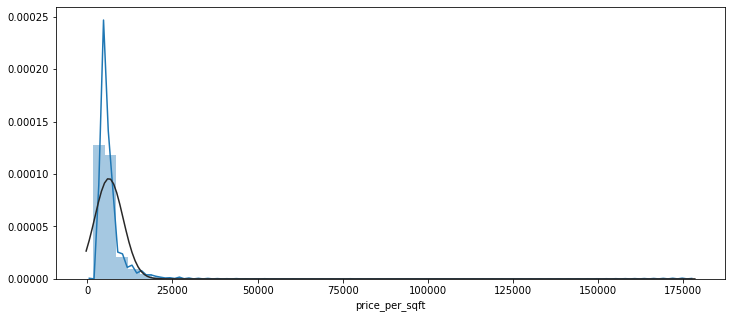

In [39]:
from scipy.stats import norm
fig = plt.figure(figsize=(12,5))
sns.distplot(df6['price_per_sqft'], fit=norm);


Text(0, 0.5, 'Count')

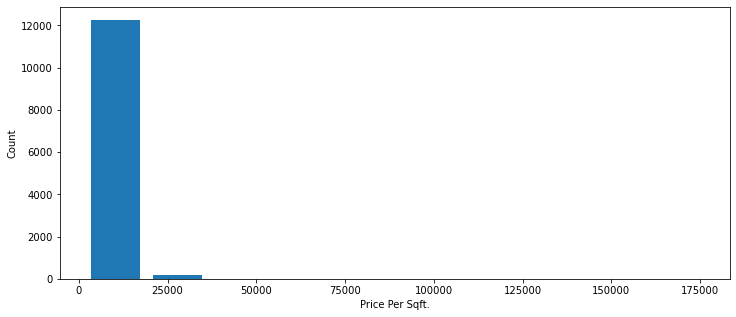

In [40]:
# Visualize to see number of data points for price_per_sqft
fig = plt.figure(figsize=(12,5))
plt.hist(df6.price_per_sqft, rwidth=0.8)
plt.xlabel("Price Per Sqft.")
plt.ylabel("Count")

##### Here we find that min price per sqft is 267 rs/sqft whereas max is 12000000, this shows a wide variation in property prices. We should remove outliers per location using mean and one standard deviation

In [41]:
# Function to remove outliers from price_per_sqft based on locations.
# As every location will have different price range.


def remove_pps_outliers(df):
    df_out = pd.DataFrame()
    for key, subdf in df.groupby('location'):          # df will group per location in subdf
        m = np.mean(subdf.price_per_sqft)              # Avg price
        st = np.std(subdf.price_per_sqft)              # statndard price
         # data without outliers: 
        reduced_df = subdf[(subdf.price_per_sqft > (m-st)) & (subdf.price_per_sqft <= (m+st))]
        df_out = pd.concat([df_out,reduced_df],ignore_index = True)   # Append reduced_df per location in df_out
    return df_out

df7 = remove_pps_outliers(df6)
df7.shape

(10254, 9)

Text(0, 0.5, 'Count')

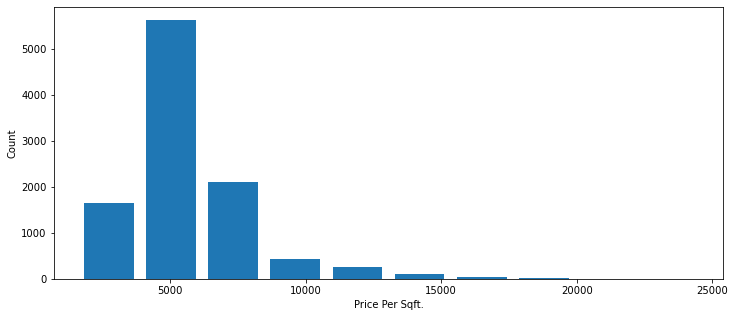

In [42]:
fig = plt.figure(figsize=(12,5))
plt.hist(df7.price_per_sqft, rwidth=0.8)
plt.xlabel("Price Per Sqft.")
plt.ylabel("Count")

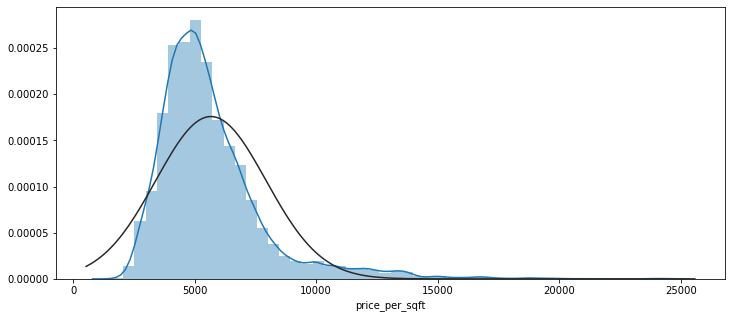

In [43]:
fig = plt.figure(figsize=(12,5))
sns.distplot(df7['price_per_sqft'], fit=norm);


In [44]:
df7.price_per_sqft.describe()

count    10254.000000
mean      5663.333883
std       2267.110386
min       1600.000000
25%       4250.000000
50%       5176.470588
75%       6434.274091
max      24509.803922
Name: price_per_sqft, dtype: float64

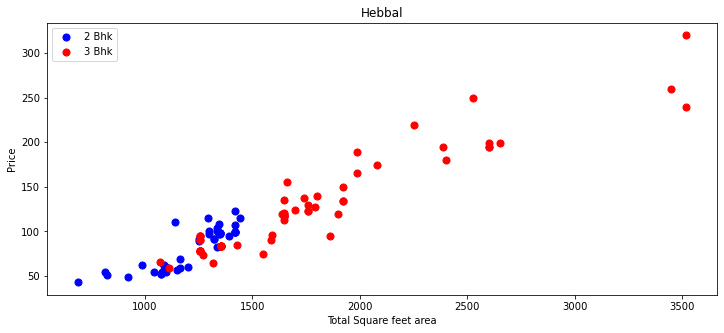

In [45]:
fig = plt.figure(figsize=(12,5))
def plot_scater_chart(df,location):
    bhk2 = df[(df.location == location) & (df.bhk == 2)]
    bhk3 = df[(df.location == location) & (df.bhk == 3)]
    
    plt.scatter(bhk2.clean_t_sqft,bhk2.price, color='blue', label='2 Bhk', s=50)
    plt.scatter(bhk3.clean_t_sqft, bhk3.price, color='red', label= '3 Bhk', s= 50)
    
    plt.xlabel('Total Square feet area')
    plt.ylabel('Price')
    plt.title(location)
    plt.legend()
    
    
plot_scater_chart(df7, 'Hebbal')   


##### We have done this bcoz without this Linear Regression accuracy was 0.5331354749737525
##### we are solving above problem now
##### After solving this accuracy - 0.8951291329369777  

##### We are remoing  properties where for same location, the price of (for example) 3 bedroom apartment is less than 2 bedroom apartment (with same square ft area). What we will do is for a given location, we will build a dictionary of stats per bhk, i.e.

##### { '1' : { 'mean': 4000, 'std: 2000, 'count': 34 }, '2' : { 'mean': 4300, 'std: 2300, 'count': 22 },
##### }

##### Now we can remove those 2 BHK apartments whose price_per_sqft is less than mean price_per_sqft of 1 BHK apartment


In [46]:
def remove_bhk_outlier(df):
    exclude_indices = np.array([])
    for location, location_df in df.groupby('location'):
        bhk_stats = {}
        for bhk, bhk_df in location_df.groupby('bhk'):
            # per bhk price count
            bhk_stats[bhk] = {
                'mean': np.mean(bhk_df.price_per_sqft),
                'std' : np.std(bhk_df.price_per_sqft),
                'count': bhk_df.shape[0]
            }
            # remove those 2 BHK apartments whose price_per_sqft is less 
            # than mean price_per_sqft of 1 BHK apartment
        for bhk, bhk_df  in location_df.groupby('bhk'):
            stats= bhk_stats.get(bhk - 1)
            if stats and stats['count']>5:
                exclude_indices = np.append(exclude_indices,
                                           bhk_df[bhk_df.price_per_sqft < (stats['mean'])].index.values)
    
    return df.drop(exclude_indices, axis = 'index')

df8 = remove_bhk_outlier(df7)
df8.shape

(7320, 9)

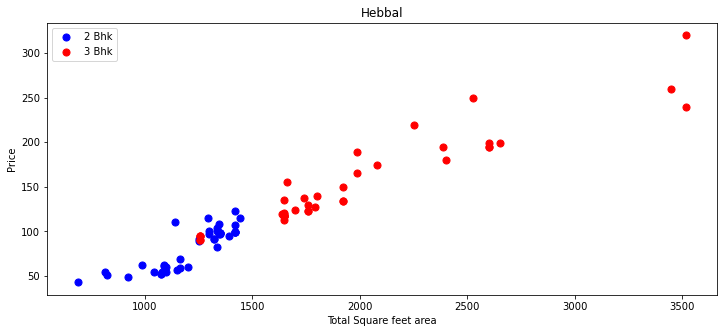

In [47]:
fig = plt.figure(figsize=(12,5))
plot_scater_chart(df8, "Hebbal")

 ## Outlier Removal Using Bathrooms Feature

In [48]:
df9 = df8.copy()
df9.bath.unique()

array([ 4.,  3.,  2.,  5.,  1.,  8.,  6.,  7.,  9., 12., 16., 13.])

In [49]:
df9[df9.bath>10]

,location,size,total_sqft,bath,balcony,price,bhk,clean_t_sqft,price_per_sqft
5284,Neeladri Nagar,10 BHK,4000,12.0,1.0,160.0,10,4000.0,4000.000000
8495,other,10 BHK,12000,12.0,1.0,525.0,10,12000.0,4375.000000
8584,other,16 BHK,10000,16.0,1.0,550.0,16,10000.0,5500.000000
9319,other,11 BHK,6000,12.0,1.0,150.0,11,6000.0,2500.000000
9651,other,13 BHK,5425,13.0,0.0,275.0,13,5425.0,5069.124424


Text(0, 0.5, 'Count')

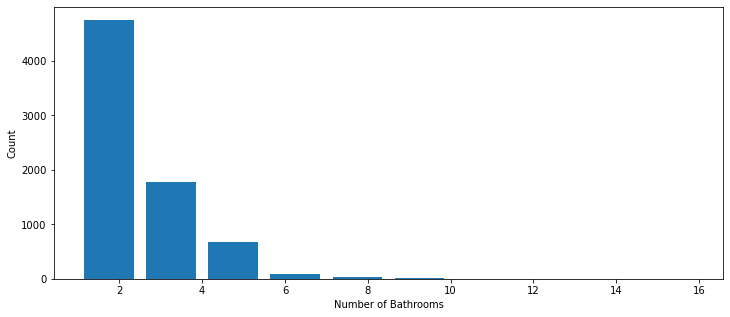

In [50]:
fig = plt.figure(figsize=(12,5))
plt.hist(df9.bath, rwidth = 0.8)
plt.xlabel('Number of Bathrooms')
plt.ylabel('Count')

In [51]:
# Shows no. of bath greater than total bhk + 2
df9[df9.bath>df9.bhk + 2]

,location,size,total_sqft,bath,balcony,price,bhk,clean_t_sqft,price_per_sqft
1628,Chikkabanavar,4 Bedroom,2460,7.0,2.0,80.0,4,2460.0,3252.032520
5245,Nagasandra,4 Bedroom,7000,8.0,1.0,450.0,4,7000.0,6428.571429
6720,Thanisandra,3 BHK,1806,6.0,2.0,116.0,3,1806.0,6423.034330
8419,other,6 BHK,11338,9.0,1.0,1000.0,6,11338.0,8819.897689


In [52]:
df9.shape

(7320, 9)

In [53]:
df10 = df9[df9.bath<df9.bhk+2]
df10.shape

(7242, 9)

In [54]:
df11 = df10.drop(['size','price_per_sqft','total_sqft'],axis=1)
df11.head(3)

,location,bath,balcony,price,bhk,clean_t_sqft
0,1st Block Jayanagar,4.0,1.0,428.0,4,2850.0
1,1st Block Jayanagar,3.0,2.0,194.0,3,1630.0
2,1st Block Jayanagar,2.0,3.0,235.0,3,1875.0


<AxesSubplot:>

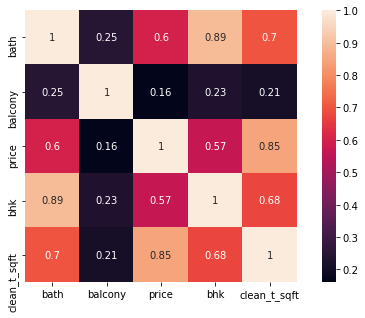

In [55]:
cormat = df11.corr()
f, ax = plt.subplots(figsize= (9,5))
sns.heatmap(cormat, vmax=1, square=True,annot=True)


In [56]:
df11.head()

,location,bath,balcony,price,bhk,clean_t_sqft
0,1st Block Jayanagar,4.0,1.0,428.0,4,2850.0
1,1st Block Jayanagar,3.0,2.0,194.0,3,1630.0
2,1st Block Jayanagar,2.0,3.0,235.0,3,1875.0
3,1st Block Jayanagar,2.0,0.0,130.0,3,1200.0
4,1st Block Jayanagar,2.0,2.0,148.0,2,1235.0


### Log Transformation


#### In the search for normality

#### The point here is to test 'price' in a very lean way. We'll do this paying attention to:

######    Histogram - Kurtosis and skewness.
######    Normal probability plot - Data distribution should closely follow the diagonal that represents the normal distribution.



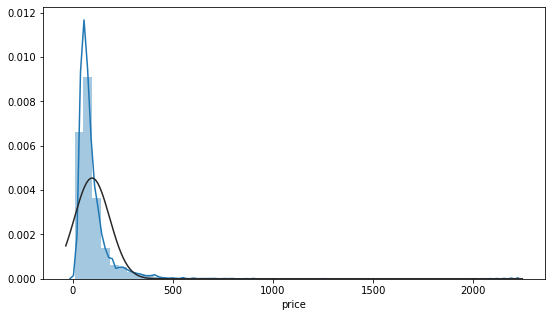

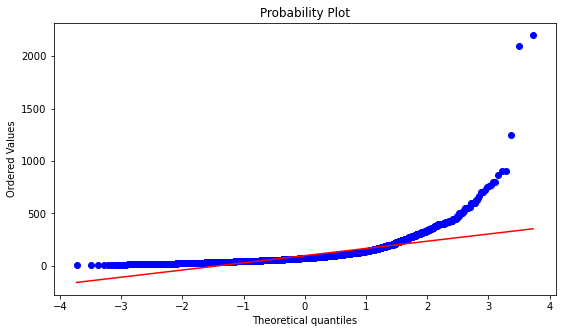

In [57]:
#histogram and normal probability plot
from scipy import stats

df12 = df11.copy()
fig = plt.figure(figsize=(9,5))
sns.distplot(df12['price'], fit=norm);
fig = plt.figure(figsize=(9,5))
res = stats.probplot(df12['price'], plot=plt)

In [58]:
df12['price'] = np.log(df12['price'])

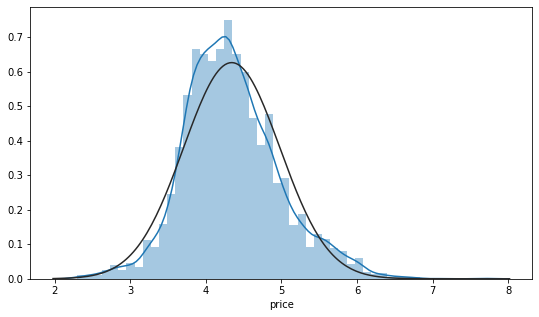

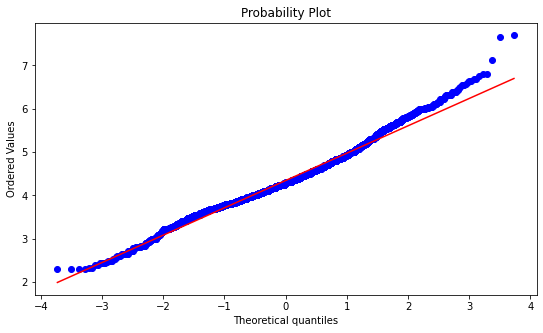

In [59]:

fig = plt.figure(figsize=(9,5))
sns.distplot(df12['price'], fit=norm);
fig = plt.figure(figsize=(9,5))
res = stats.probplot(df12['price'], plot=plt)

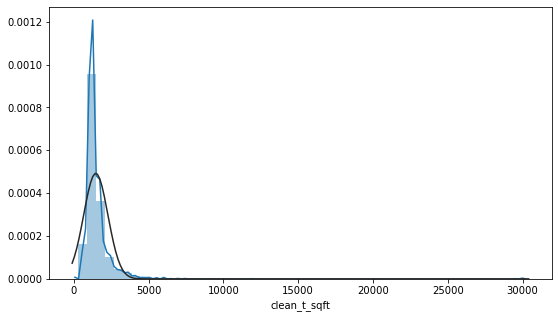

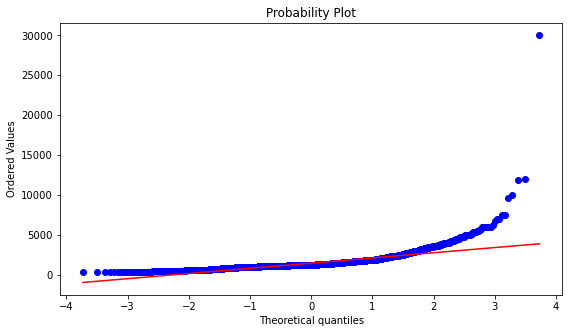

In [60]:
fig = plt.figure(figsize=(9,5))
sns.distplot(df12['clean_t_sqft'], fit=norm);
fig = plt.figure(figsize=(9,5))
res = stats.probplot(df12['clean_t_sqft'], plot=plt)


In [61]:
df12['clean_t_sqft'] = np.log(df12['clean_t_sqft'])

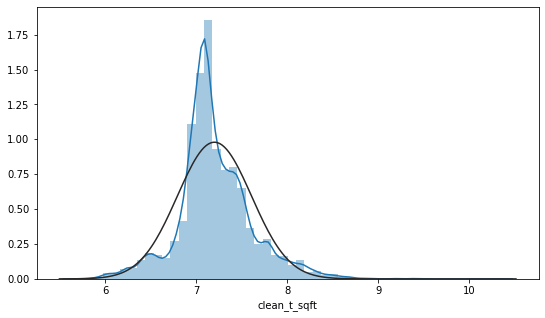

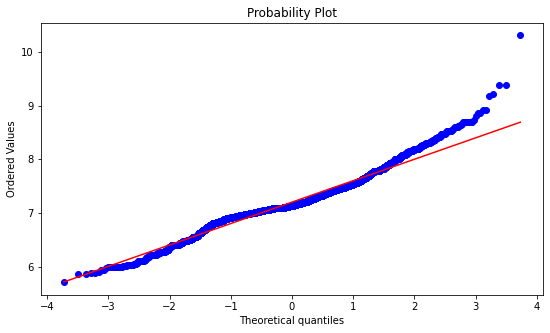

In [62]:
fig = plt.figure(figsize=(9,5))
sns.distplot(df12['clean_t_sqft'], fit=norm);
fig = plt.figure(figsize=(9,5))
res = stats.probplot(df12['clean_t_sqft'], plot=plt)

### Use One Hot Encoding For Location

In [63]:
df12.head()

,location,bath,balcony,price,bhk,clean_t_sqft
0,1st Block Jayanagar,4.0,1.0,6.059123,4,7.955074
1,1st Block Jayanagar,3.0,2.0,5.267858,3,7.396335
2,1st Block Jayanagar,2.0,3.0,5.459586,3,7.536364
3,1st Block Jayanagar,2.0,0.0,4.867534,3,7.090077
4,1st Block Jayanagar,2.0,2.0,4.997212,2,7.118826


In [64]:
dum = pd.get_dummies(df12.location)
dum.head(3)

,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,6th Phase JP Nagar,7th Phase JP Nagar,8th Phase JP Nagar,9th Phase JP Nagar,...,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur,other
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [65]:
df13 = pd.concat([df12, dum.drop('other',axis = 1)], axis = 1)
df13.head(3)

,location,bath,balcony,price,bhk,clean_t_sqft,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,1st Block Jayanagar,4.0,1.0,6.059123,4,7.955074,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1st Block Jayanagar,3.0,2.0,5.267858,3,7.396335,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1st Block Jayanagar,2.0,3.0,5.459586,3,7.536364,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [66]:
df13 = df13.drop('location', axis = 1)
df13.head(3)

,bath,balcony,price,bhk,clean_t_sqft,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,4.0,1.0,6.059123,4,7.955074,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,3.0,2.0,5.267858,3,7.396335,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2.0,3.0,5.459586,3,7.536364,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0



### Build a Model Now...


In [67]:
df13.shape

(7242, 246)

In [68]:
X = df13.drop('price', axis=1)
X.head()

,bath,balcony,bhk,clean_t_sqft,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,4.0,1.0,4,7.955074,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,3.0,2.0,3,7.396335,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2.0,3.0,3,7.536364,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,2.0,0.0,3,7.090077,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2.0,2.0,2,7.118826,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [69]:
y = df13.price
y.head(3)

0    6.059123
1    5.267858
2    5.459586
Name: price, dtype: float64

### Modeling

In [70]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state =10)

In [71]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train, y_train)
lr.score(X_test, y_test)

0.9016001683664936

In [72]:
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score

cv = ShuffleSplit(n_splits = 5, test_size = 0.2, random_state =0)
cross_val_score(LinearRegression(),X, y, cv = cv)

array([0.89993389, 0.91429914, 0.90712241, 0.90653309, 0.91299425])

In [73]:
# K-fold validation for Linear Regression:
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score
cv1 = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)
cross_val_score(LinearRegression(), X, y, cv=cv1)

array([0.89993389, 0.91429914, 0.90712241, 0.90653309, 0.91299425])